[Sebastian Raschka](http://www.sebastianraschka.com)

[back](https://github.com/rasbt/matplotlib-gallery) to the `matplotlib-gallery` at [https://github.com/rasbt/matplotlib-gallery](https://github.com/rasbt/matplotlib-gallery)

In [3]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [4]:
%watermark -u -v -d -p matplotlib,numpy

last updated: 2017-08-19 

CPython 3.6.2
IPython 6.1.0

matplotlib 2.0.2
numpy 1.13.1


<font size="1.5em">[More info](http://nbviewer.ipython.org/github/rasbt/python_reference/blob/master/ipython_magic/watermark.ipynb) about the `%watermark` extension</font>

In [5]:
%matplotlib inline

<br>
<br>

# 3D Plots in matplotlib

# Sections

- [3D scatter plot](#3D-scatter-plot)

- [3D scatter plot with eigenvectors](#3D-scatter-plot-with-eigenvectors)

- [3D cube](#3D-cube)

- [Multivariate Gaussian distribution with colored surface](#Multivariate-Gaussian-distribution-with-colored-surface)

- [Multivariate Gaussian distribution as mesh grid](#Multivariate-Gaussian-distribution-as-mesh-grid)

<br>
<br>

# 3D scatter plot

[[back to top](#Sections)]

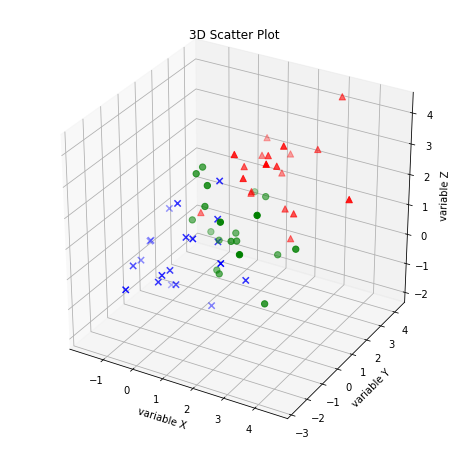

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt

# Generate some 3D sample data
mu_vec1 = np.array([0,0,0]) # mean vector
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]]) # covariance matrix

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
class2_sample = np.random.multivariate_normal(mu_vec1 + 1, cov_mat1, 20)
class3_sample = np.random.multivariate_normal(mu_vec1 + 2, cov_mat1, 20)

# class1_sample.shape -> (20, 3), 20 rows, 3 columns

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(class1_sample[:,0], class1_sample[:,1], class1_sample[:,2], 
           marker='x', color='blue', s=40, label='class 1')
ax.scatter(class2_sample[:,0], class2_sample[:,1], class2_sample[:,2], 
           marker='o', color='green', s=40, label='class 2')
ax.scatter(class3_sample[:,0], class3_sample[:,1], class3_sample[:,2], 
           marker='^', color='red', s=40, label='class 3')

ax.set_xlabel('variable X')
ax.set_ylabel('variable Y')
ax.set_zlabel('variable Z')

plt.title('3D Scatter Plot')
     
plt.show()

<br>
<br>

# 3D scatter plot with eigenvectors

[[back to top](#Sections)]

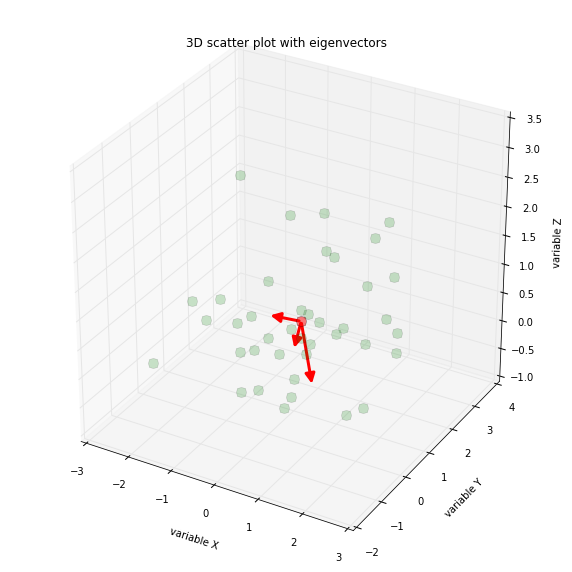

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


# Generate some example data
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

# concatenate data for PCA
samples = np.concatenate((class1_sample, class2_sample), axis=0)

# mean values
mean_x = np.mean(samples[:,0])
mean_y = np.mean(samples[:,1])
mean_z = np.mean(samples[:,2])

#eigenvectors and eigenvalues
eig_val, eig_vec = np.linalg.eig(cov_mat1)

################################
#plotting eigenvectors
################################    

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(samples[:,0], samples[:,1], samples[:,2], 'o', markersize=10, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], 
                [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('variable X')
ax.set_ylabel('variable Y')
ax.set_zlabel('variable Z')

plt.title('3D scatter plot with eigenvectors')

plt.show()

<br>
<br>

# 3D cube

[[back to top](#Sections)]

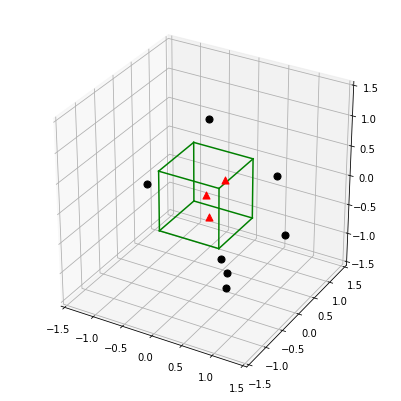

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# Plot Points

# samples within the cube
X_inside = np.array([[0,0,0],[0.2,0.2,0.2],[0.1, -0.1, -0.3]])

X_outside = np.array([[-1.2,0.3,-0.3],[0.8,-0.82,-0.9],[1, 0.6, -0.7],
                      [0.8,0.7,0.2],[0.7,-0.8,-0.45],[-0.3, 0.6, 0.9],
                      [0.7,-0.6,-0.8]])

for row in X_inside:
    ax.scatter(row[0], row[1], row[2], color="r", s=50, marker='^')

for row in X_outside:    
    ax.scatter(row[0], row[1], row[2], color="k", s=50)

# Plot Cube
h = [-0.5, 0.5]
for s, e in combinations(np.array(list(product(h,h,h))), 2):
    if np.sum(np.abs(s-e)) == h[1]-h[0]:
        ax.plot3D(*zip(s,e), color="g")
        
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

plt.show()

<br>
<br>

# Multivariate Gaussian distribution with colored surface

[[back to top](#Sections)]

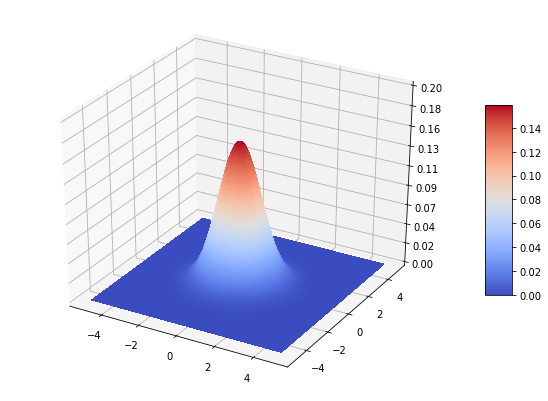

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X, Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

plt.show()

<br>
<br>

# Multivariate Gaussian distribution as mesh grid

[[back to top](#Sections)]

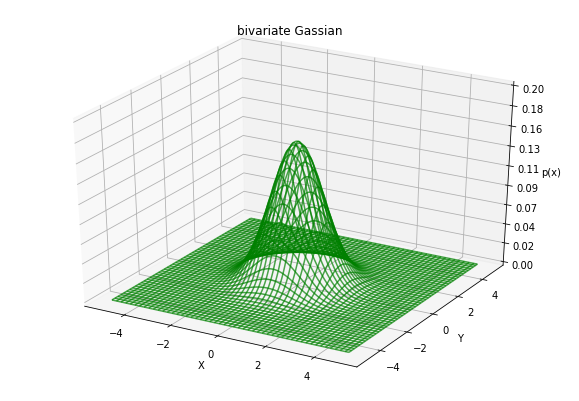

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y)
surf = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, color='g', alpha=0.7)

ax.set_zlim(0, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('bivariate Gassian')

plt.show()